<a href="https://colab.research.google.com/github/Dawon00/nlp_2022/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

data = pd.read_table('ratings_train.txt')

print('훈련용 리뷰 개수 :',len(data)) # 훈련용 리뷰 개수 출력


훈련용 리뷰 개수 : 150000


In [22]:
data[:5]


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [12]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : True


In [16]:
data = data.dropna(axis=0)

In [17]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


id          0
document    5
label       0
dtype: int64

In [18]:
print('document열의 유니크한 값 :',data['document'].nunique())


document열의 유니크한 값 : 146182


In [19]:
# document 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['document'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 146182


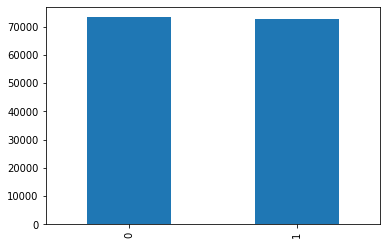

In [20]:
data['label'].value_counts().plot(kind='bar')


In [23]:
print('부정리뷰과 긍정리뷰의 개수')
print(data.groupby('label').size().reset_index(name='count'))

부정리뷰과 긍정리뷰의 개수
   label  count
0      0  73342
1      1  72840


In [25]:
print(f'부정리뷰의 비율 = {round(data["label"].value_counts()[0]/len(data) * 100,3)}%')
print(f'긍정리뷰의 비율 = {round(data["label"].value_counts()[1]/len(data) * 100,3)}%')

부정리뷰의 비율 = 50.172%
긍정리뷰의 비율 = 49.828%


In [27]:
X_data = data['document']
y_data = data['label']
print('리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

리뷰의 개수: 146182
레이블의 개수: 146182


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [29]:
print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
부정 리뷰 = 50.171%
긍정 리뷰 = 49.829%


In [30]:
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
부정 리뷰 = 50.173%
긍정 리뷰 = 49.827%


In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[60163, 71, 1098, 651, 26055, 2225, 176, 1789, 10133, 4422, 4895, 14472, 17000, 5134, 323, 4423, 319, 3496, 2940, 257, 42, 3, 2327, 60164, 12628, 165, 64, 177, 60165, 133, 60166], [10134, 60167, 60168, 7280, 4640], [8452, 370, 60169, 60170, 3123, 35929, 4896, 60171], [60172], [12629, 3124, 2437, 14473, 4]]


In [32]:
word_to_index = tokenizer.word_index
print(word_to_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 189656
단어 집합(vocabulary)에서 희귀 단어의 비율: 75.91766806234939
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 20.263280763366772


In [34]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 249819


리뷰의 최대 길이 : 59
리뷰의 평균 길이 : 8.003412


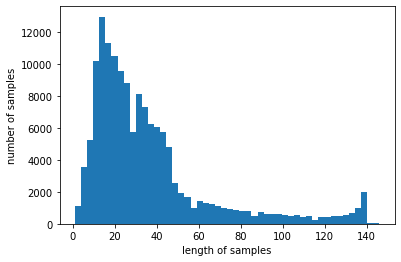

In [35]:
print('리뷰의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [36]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (116945, 189)


In [42]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
1462/1462 [==============================] - 60s 40ms/step - loss: 0.5073 - acc: 0.7318 - val_loss: 0.4230 - val_acc: 0.7952
Epoch 2/15
1462/1462 [==============================] - 58s 40ms/step - loss: 0.3515 - acc: 0.8489 - val_loss: 0.4297 - val_acc: 0.7988
Epoch 3/15
1462/1462 [==============================] - 59s 40ms/step - loss: 0.3436 - acc: 0.8624 - val_loss: 0.4480 - val_acc: 0.7942
Epoch 4/15
1462/1462 [==============================] - 58s 40ms/step - loss: 0.2678 - acc: 0.8985 - val_loss: 0.5030 - val_acc: 0.7899
Epoch 5/15
1462/1462 [==============================] - 58s 40ms/step - loss: 0.1481 - acc: 0.9493 - val_loss: 0.5814 - val_acc: 0.7707
Epoch 6/15
1462/1462 [==============================] - 58s 40ms/step - loss: 0.1157 - acc: 0.9627 - val_loss: 0.6341 - val_acc: 0.7726
Epoch 7/15
1462/1462 [==============================] - 59s 40ms/step - loss: 0.1077 - acc: 0.9641 - val_loss: 0.6530 - val_acc: 0.7672
Epoch 8/15
1462/1462 [==========================

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          7994208   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,996,321
Trainable params: 7,996,321
Non-trainable params: 0
_________________________________________________________________


In [44]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

914/914 [==============================] - 6s 6ms/step - loss: 0.7494 - acc: 0.7594

 테스트 정확도: 0.7594


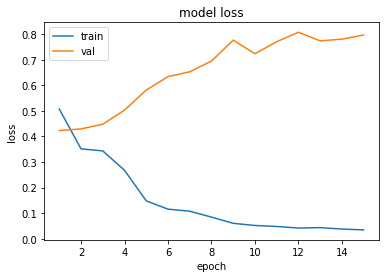

In [45]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()